In [2]:
## import some packages to use
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

#To see our directory
import os
import random
import gc   #Gabage collector for cleaning deleted data from memory




In [3]:
train_dir = '../data/perrosygatos/train'
test_dir = '../data/perrosygatos/test1'

train_dogs = ['../data/perrosygatos/train/{}'.format(i) for i in os.listdir(train_dir) if 'dog' in i]  #get dog images
train_cats = ['../data/perrosygatos/train/{}'.format(i) for i in os.listdir(train_dir) if 'cat' in i]  #get cat images

test_imgs = ['../data/perrosygatos/test1/{}'.format(i) for i in os.listdir(test_dir)] #get test images

train_imgs = train_dogs[:2000] + train_cats[:2000]  # slice the dataset and use 2000 in each class
random.shuffle(train_imgs)  # shuffle it randomly

#Clear list that are useless
del train_dogs
del train_cats
gc.collect()   #collect garbage to save memory

34

In [ ]:
import os
 
dirpath = os.getcwd()
print("current directory is : " + dirpath)
foldername = os.path.basename(dirpath)
print("Directory name is : " + foldername)

current directory is : /Users/alejandro.robles/PycharmProjects/DogsCats456/scripts
Directory name is : scripts


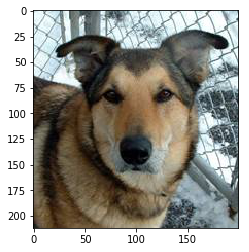

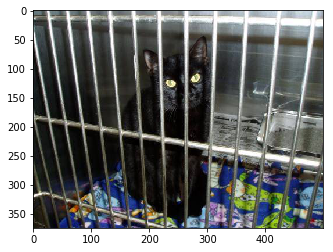

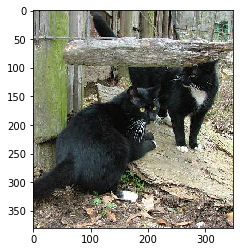

In [6]:

import matplotlib.image as mpimg
for ima in train_imgs[0:3]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

In [7]:
import cv2

#Lets declare our image dimensions
#we are using coloured images. 
nrows = 150
ncolumns = 150
channels = 3  #change to 1 if you want to use grayscale image


#A function to read and process the images to an acceptable format for our model
def read_and_process_image(list_of_images):
    """
    Returns two arrays: 
        X is an array of resized images
        y is an array of labels
    """
    X = [] # images
    y = [] # labels
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows,ncolumns), interpolation=cv2.INTER_CUBIC))  #Read the image
        #get the labels
        if 'dog' in image:
            y.append(1)
        elif 'cat' in image:
            y.append(0)
    
    return X, y

In [8]:
#get the train and label data
X, y = read_and_process_image(train_imgs)

In [9]:
import numpy as np

y2 = np.array(y)

In [10]:
y2.shape

(4000,)

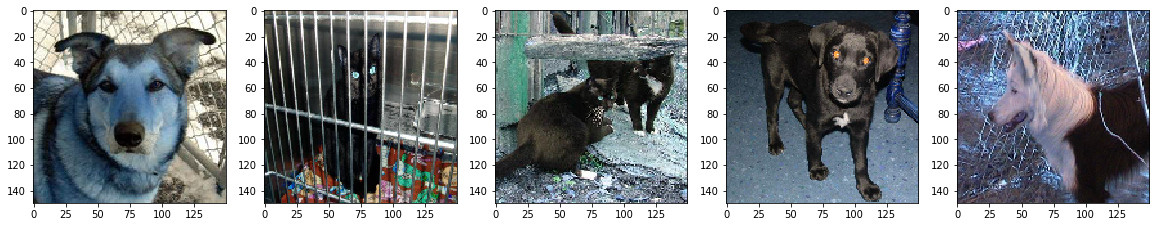

In [11]:

#Lets view some of the pics
plt.figure(figsize=(20,10))
columns = 5
for i in range(columns):
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.imshow(X[i])

In [12]:
import seaborn as sns
del train_imgs
gc.collect()

#Convert list to numpy array
X = np.array(X)
y = np.array(y)

#Lets plot the label to be sure we just have two class
sns.countplot(y)
plt.title('Labels for Cats and Dogs')


Text(0.5, 1.0, 'Labels for Cats and Dogs')

In [13]:
print("Shape of train images is:", X.shape)
print("Shape of labels is:", y.shape)

#Lets split the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=2)

print("Shape of train images is:", X_train.shape)
print("Shape of validation images is:", X_val.shape)
print("Shape of labels is:", y_train.shape)
print("Shape of labels is:", y_val.shape)


Shape of train images is: (4000, 150, 150, 3)
Shape of labels is: (4000,)
Shape of train images is: (3200, 150, 150, 3)
Shape of validation images is: (800, 150, 150, 3)
Shape of labels is: (3200,)
Shape of labels is: (800,)


In [22]:

#clear memory
del X
del y
gc.collect()

#get the length of the train and validation data
ntrain = len(X_train)
nval = len(X_val)

#We will use a batch size of 32. Note: batch size should be a factor of 2.***4,8,16,32,64...***
batch_size = 32


NameError: name 'X' is not defined

In [ ]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  #Dropout for regularization
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) 


In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [24]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])


In [25]:
#Lets create the augmentation configuration
#This helps prevent overfitting, since we are using a small dataset
train_datagen = ImageDataGenerator(rescale=1./255,   #Scale the image between 0 and 1
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)  #We do not augment validation data. we only perform rescale

In [26]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)


In [27]:

#The training part
#We train for 64 epochs with about 100 steps per epoch
history = model.fit_generator(train_generator,
                              steps_per_epoch=ntrain // batch_size,
                              epochs=64,
                              validation_data=val_generator,
                              validation_steps=nval // batch_size)

Epoch 1/64
400/400 [==============================] - 89s 223ms/step - loss: 0.6592 - acc: 0.6100 - val_loss: 0.6406 - val_acc: 0.6425
Epoch 2/64
400/400 [==============================] - 87s 217ms/step - loss: 0.6440 - acc: 0.6338 - val_loss: 0.6164 - val_acc: 0.6262
Epoch 3/64
400/400 [==============================] - 87s 217ms/step - loss: 0.6320 - acc: 0.6438 - val_loss: 0.6101 - val_acc: 0.6600
Epoch 4/64
400/400 [==============================] - 83s 207ms/step - loss: 0.6172 - acc: 0.6622 - val_loss: 0.5937 - val_acc: 0.6687
Epoch 5/64
400/400 [==============================] - 81s 203ms/step - loss: 0.6051 - acc: 0.6706 - val_loss: 0.5788 - val_acc: 0.6900
Epoch 6/64
400/400 [==============================] - 83s 208ms/step - loss: 0.6084 - acc: 0.6747 - val_loss: 0.5731 - val_acc: 0.6850
Epoch 7/64
400/400 [==============================] - 84s 210ms/step - loss: 0.5977 - acc: 0.6775 - val_loss: 0.5604 - val_acc: 0.6963
Epoch 8/64
400/400 [==============================] - 8

In [28]:
print('hey')

hey
